Descrição da Dengue

In [1]:
#Intalação das bibliotecas

#!pip install xlrd
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly


In [2]:
#Libs

import pandas as pd
import numpy as np

#libs gráficas
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#Avisos
import warnings
warnings.filterwarnings('ignore')

### Carregando os dados

In [3]:
df_dengue = pd.read_excel('Base de Dados Dengue.xlsx')
df_dengue.head()

municipio  uf data_infeccoes  qtd_infeccoes
0  ALTA FLORESTA D'OESTE  RO     2013-01-01             34
1  ALTA FLORESTA D'OESTE  RO     2013-02-01             44
2  ALTA FLORESTA D'OESTE  RO     2013-03-01             15
3  ALTA FLORESTA D'OESTE  RO     2013-04-01              4
4  ALTA FLORESTA D'OESTE  RO     2013-05-01              3

### Explorando o dataset

Tamanhdo da Base de Dados

In [4]:
print(f'Tamanho do nosso Dataset: {df_dengue.shape}')

Tamanho do nosso Dataset: (728772, 4)


In [5]:
df_dengue.shape

(728772, 4)

Verificar os tipos dos dados

In [6]:
df_dengue.dtypes

municipio                 object
uf                        object
data_infeccoes    datetime64[ns]
qtd_infeccoes              int64
dtype: object

Existe valores nulos?

In [7]:
print(f'Quantidade de dados nulos: {df_dengue.isnull().sum().sum()}')

Quantidade de dados nulos: 0


In [8]:
df_dengue.isnull()

municipio     uf  data_infeccoes  qtd_infeccoes
0           False  False           False          False
1           False  False           False          False
2           False  False           False          False
3           False  False           False          False
4           False  False           False          False
...           ...    ...             ...            ...
728767      False  False           False          False
728768      False  False           False          False
728769      False  False           False          False
728770      False  False           False          False
728771      False  False           False          False

[728772 rows x 4 columns]

In [9]:
df_dengue.isnull().sum()

municipio         0
uf                0
data_infeccoes    0
qtd_infeccoes     0
dtype: int64

In [10]:
df_dengue.isnull().sum().sum()

0

Quais informações queremos trabalhar?

In [11]:
df_dengue.head()

municipio  uf data_infeccoes  qtd_infeccoes
0  ALTA FLORESTA D'OESTE  RO     2013-01-01             34
1  ALTA FLORESTA D'OESTE  RO     2013-02-01             44
2  ALTA FLORESTA D'OESTE  RO     2013-03-01             15
3  ALTA FLORESTA D'OESTE  RO     2013-04-01              4
4  ALTA FLORESTA D'OESTE  RO     2013-05-01              3

Informações sobre a base

In [12]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728772 entries, 0 to 728771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   municipio       728772 non-null  object        
 1   uf              728772 non-null  object        
 2   data_infeccoes  728772 non-null  datetime64[ns]
 3   qtd_infeccoes   728772 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.2+ MB


Verificar os valores únicos?

In [13]:
df_dengue.nunique()

municipio         5243
uf                  27
data_infeccoes     132
qtd_infeccoes     1157
dtype: int64

Precisamos calcular a quantidade de pessoas que pegaram dengue por Município por ano.

In [14]:
# Criar uma coluna com o ano
df_dengue["ano"] = df_dengue["data_infeccoes"].dt.year

In [15]:
df_dengue

municipio  uf data_infeccoes  qtd_infeccoes   ano
0       ALTA FLORESTA D'OESTE  RO     2013-01-01             34  2013
1       ALTA FLORESTA D'OESTE  RO     2013-02-01             44  2013
2       ALTA FLORESTA D'OESTE  RO     2013-03-01             15  2013
3       ALTA FLORESTA D'OESTE  RO     2013-04-01              4  2013
4       ALTA FLORESTA D'OESTE  RO     2013-05-01              3  2013
...                       ...  ..            ...            ...   ...
728767               BRASILIA  DF     2023-08-01            939  2023
728768               BRASILIA  DF     2023-09-01            843  2023
728769               BRASILIA  DF     2023-10-01            686  2023
728770               BRASILIA  DF     2023-11-01           1300  2023
728771               BRASILIA  DF     2023-12-01           5603  2023

[728772 rows x 5 columns]

In [16]:
# Agrupar por município e ano
infeccoes_municipio = df_dengue.groupby(["ano", "municipio", "uf"])["qtd_infeccoes"].sum().reset_index()

In [17]:
infeccoes_municipio

ano            municipio  uf  qtd_infeccoes
0      2013      ABADIA DE GOIAS  GO             52
1      2013  ABADIA DOS DOURADOS  MG              0
2      2013            ABADIANIA  GO             37
3      2013               ABAETE  MG            486
4      2013           ABAETETUBA  PA             15
...     ...                  ...  ..            ...
60726  2023          XIQUE-XIQUE  BA              0
60727  2023               ZABELE  PB              7
60728  2023             ZACARIAS  SP              0
60729  2023              ZE DOCA  MA              0
60730  2023               ZORTEA  SC              0

[60731 rows x 4 columns]

Agora vamos olhar por Estado

In [18]:
# Agrupar por estado (UF) e ano
infeccoes_estado = df_dengue.groupby(["ano", "uf"])["qtd_infeccoes"].sum().reset_index()

In [19]:
display(infeccoes_estado)

ano  uf  qtd_infeccoes
0    2013  AC           1663
1    2013  AL            704
2    2013  AM           4327
3    2013  AP            546
4    2013  BA          13417
..    ...  ..            ...
292  2023  RS          27389
293  2023  SC          77954
294  2023  SE           1749
295  2023  SP         198774
296  2023  TO           1232

[297 rows x 3 columns]

Estatística Descritiva

In [20]:
infeccoes_estado.describe()

ano  qtd_infeccoes
count   297.000000     297.000000
mean   2018.000000   12872.474747
std       3.167615   31630.107741
min    2013.000000       0.000000
25%    2015.000000     780.000000
50%    2018.000000    2229.000000
75%    2021.000000   10098.000000
max    2023.000000  286000.000000

Interpretação da estatística descritiva utilizando o gráfico de Boxplot Whiskers

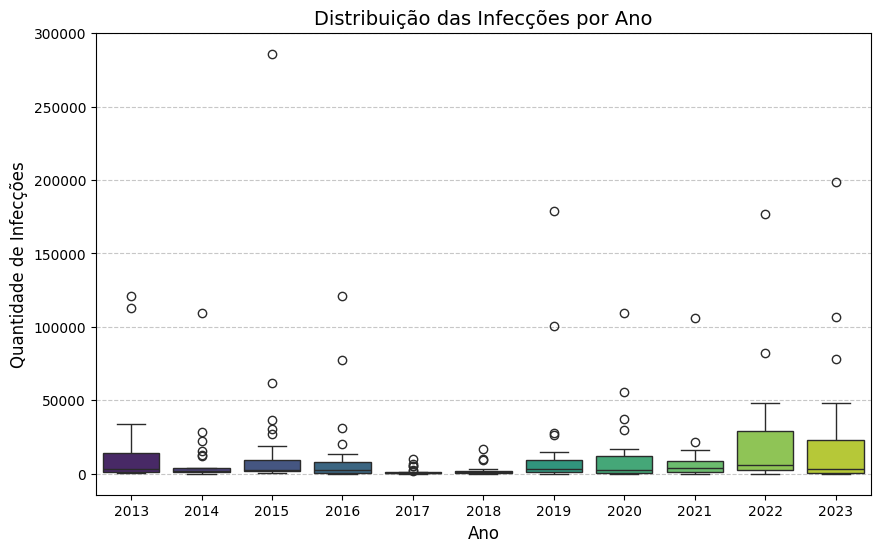

In [21]:
# Criar boxplot comparando a quantidade de infecções por ano
plt.figure(figsize=(10, 6))
sns.boxplot(data=infeccoes_estado, x="ano", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Distribuição das Infecções por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


Vamos olhar para o Ano de 2023

In [22]:
# Filtrar os dados para o ano de 2023
infeccoes_estado_2023 = infeccoes_estado[(infeccoes_estado["ano"] == 2023)]


In [23]:
infeccoes_estado_2023

ano  uf  qtd_infeccoes
270  2023  AC           1781
271  2023  AL            473
272  2023  AM           3263
273  2023  AP            742
274  2023  BA          13249
275  2023  CE           7437
276  2023  DF          23710
277  2023  ES              0
278  2023  GO          21682
279  2023  MA           2428
280  2023  MG         106923
281  2023  MS          21098
282  2023  MT          19356
283  2023  PA           2607
284  2023  PB            746
285  2023  PE            680
286  2023  PI            431
287  2023  PR          48328
288  2023  RJ          27905
289  2023  RN            355
290  2023  RO           7904
291  2023  RR            182
292  2023  RS          27389
293  2023  SC          77954
294  2023  SE           1749
295  2023  SP         198774
296  2023  TO           1232

In [24]:
infeccoes_estado_2023.describe()

ano  qtd_infeccoes
count    27.0      27.000000
mean   2023.0   22902.888889
std       0.0   43368.215001
min    2023.0       0.000000
25%    2023.0     744.000000
50%    2023.0    3263.000000
75%    2023.0   22696.000000
max    2023.0  198774.000000

Visualizar os dados via boxplot

Matplotlib

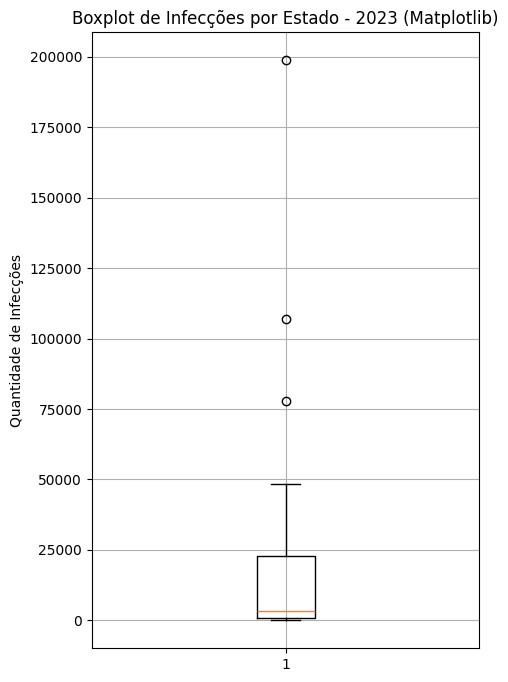

In [25]:
# Criar boxplot com Matplotlib
plt.figure(figsize=(5, 8))
plt.boxplot(infeccoes_estado_2023["qtd_infeccoes"], vert=True)
plt.title("Boxplot de Infecções por Estado - 2023 (Matplotlib)")
plt.ylabel("Quantidade de Infecções")
plt.grid(True)
plt.show()


Seaborn

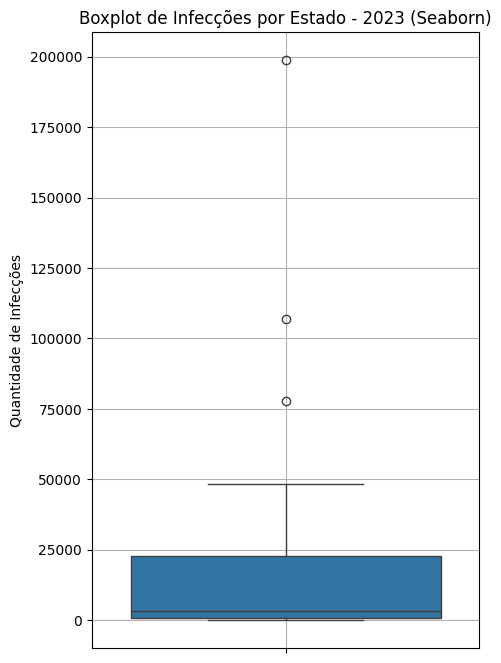

In [26]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=infeccoes_estado_2023["qtd_infeccoes"])
plt.title("Boxplot de Infecções por Estado - 2023 (Seaborn)")
plt.ylabel("Quantidade de Infecções")
plt.grid(True)
plt.show()

Plotly

In [27]:
# Criar boxplot com Plotly na vertical
fig = px.box(infeccoes_estado_2023, y="qtd_infeccoes", title="Boxplot de Infecções por Estado - 2023 (Plotly)")
fig.show()

Comparação entre os estados

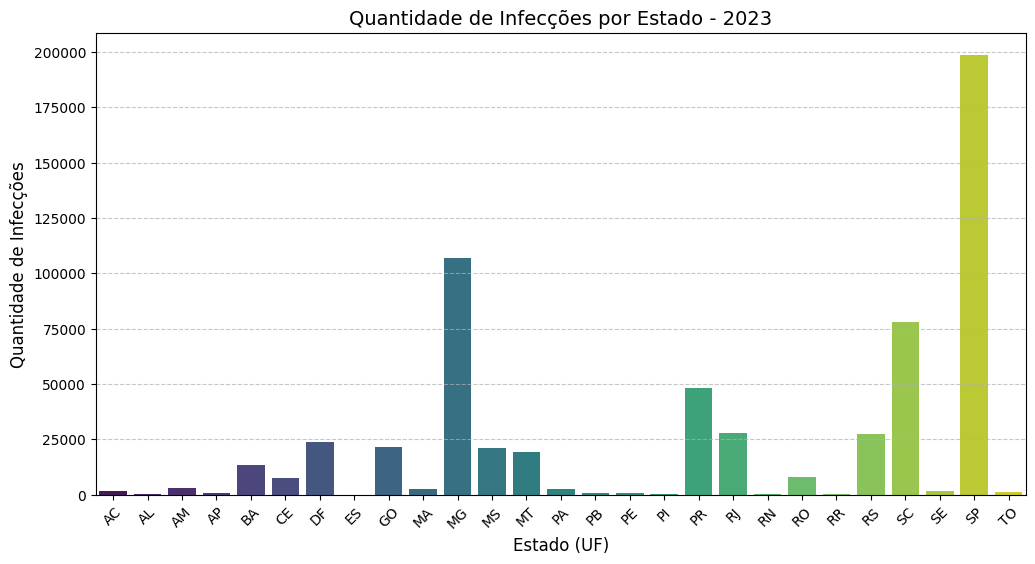

In [28]:
# Criar gráfico de barras comparando a quantidade de infecções por estado em 2023 usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=infeccoes_estado_2023, x="uf", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Quantidade de Infecções por Estado - 2023", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

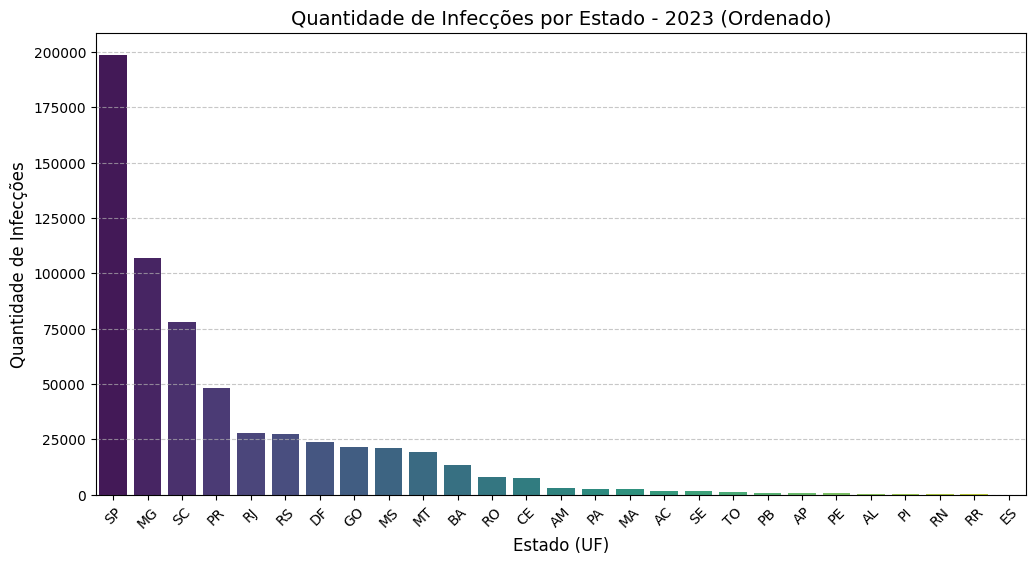

In [29]:
# Ordenar os dados do maior para o menor número de infecções
infeccoes_2023 = infeccoes_estado_2023.sort_values(by="qtd_infeccoes", ascending=False)

# Criar gráfico de barras ordenado
plt.figure(figsize=(12, 6))
sns.barplot(data=infeccoes_2023, x="uf", y="qtd_infeccoes", palette="viridis")

# Personalizar o gráfico
plt.title("Quantidade de Infecções por Estado - 2023 (Ordenado)", fontsize=14)
plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


Gráfico de Tendência

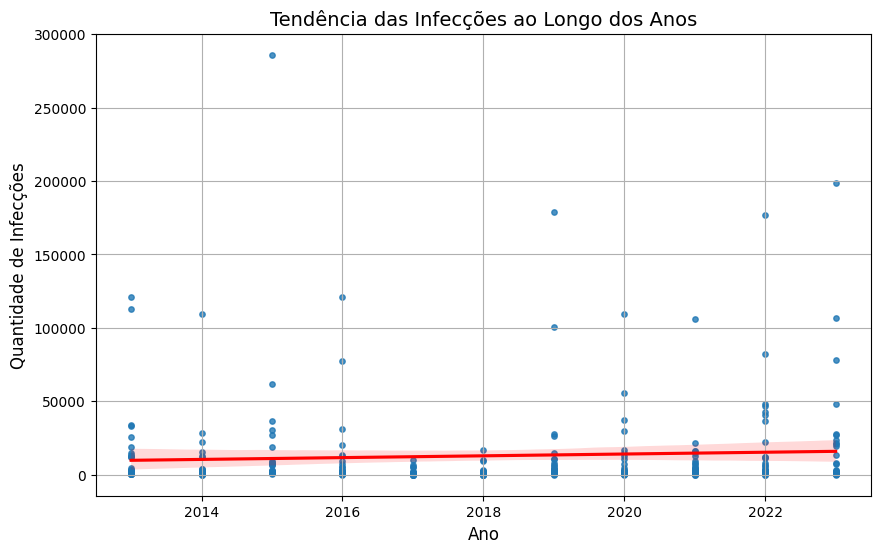

In [30]:
# Criar gráfico de regressão linear simples usando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=infeccoes_estado, x="ano", y="qtd_infeccoes", scatter_kws={"s": 15}, line_kws={"color": "red"})

# Personalizar o gráfico
plt.title("Tendência das Infecções ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Quantidade de Infecções", fontsize=12)
plt.grid(True)

# Exibir o gráfico
plt.show()
